# Test loading of backbone

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fast.model.autoencoder import build_encoder
import torch
from torchvision.models import resnet18, ResNet18_Weights, resnet50, ResNet50_Weights, vgg16, VGG16_Weights
from torchvision.models._utils import IntermediateLayerGetter
import matplotlib.pyplot as plt

In [3]:
# bb = build_backbone()
bb = resnet18(weights=ResNet18_Weights.DEFAULT)
# print(bb._modules)
return_layers = {'layer1': 'layer1', 'layer2': 'layer2', 'layer3': 'layer3', 'layer4' : 'layer4'}
body = IntermediateLayerGetter(bb, return_layers=return_layers)



In [4]:
tens = torch.rand(size=(1, 3, 256, 256))
print(tens.shape)
ret = body(tens)

torch.Size([1, 3, 256, 256])


In [5]:
ret['layer4'].shape


torch.Size([1, 512, 8, 8])

In [6]:
encoder = build_encoder()
print(encoder)

IntermediateLayerGetter(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU

In [7]:
from fast.model.autoencoder import Decoder

tens_temp = torch.rand(size=(1, 256, 16, 16))
decoder = Decoder(256)

decoder.load_state_dict(torch.load(r'./fast/model_dicts/decoder_99.pt'))

print(decoder)
decoder(tens_temp).shape
decoder.eval()

Decoder(
  (upscaling_layers): ModuleList(
    (0): Upscale(
      (conv): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (conv2): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (pixel_shuffle): PixelShuffle(upscale_factor=2)
      (activation): PReLU(num_parameters=128)
    )
    (1): Upscale(
      (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (conv2): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (pixel_shuffle): PixelShuffle(upscale_factor=2)
      (activation): PReLU(num_parameters=64)
    )
    (2): Upscale(
      (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (pixel_shuffle): PixelShuffle(upscale_factor=2)
      (activation): PReLU(num_parameters=32)
    )
    (3): Upscale(
      (conv): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (conv2)

Decoder(
  (upscaling_layers): ModuleList(
    (0): Upscale(
      (conv): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (conv2): Conv2d(128, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (pixel_shuffle): PixelShuffle(upscale_factor=2)
      (activation): PReLU(num_parameters=128)
    )
    (1): Upscale(
      (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (conv2): Conv2d(64, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (pixel_shuffle): PixelShuffle(upscale_factor=2)
      (activation): PReLU(num_parameters=64)
    )
    (2): Upscale(
      (conv): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (pixel_shuffle): PixelShuffle(upscale_factor=2)
      (activation): PReLU(num_parameters=32)
    )
    (3): Upscale(
      (conv): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (conv2)

In [8]:
from fast.datahandling.DataReader import DataReader
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

dataset = DataReader(
    files_path=r'C:\Users\Theis\Pictures\Camera Roll\Ny mappe',
    style_path=r'C:\Users\Theis\Pictures\art',
    image_size=(256, 256)
)

Number of content images: 17
Number of style images: 10


In [9]:
# con, sty = dataset.__getitem__(0)

In [10]:
train_dl = DataLoader(dataset, 4, shuffle=True, num_workers=3)

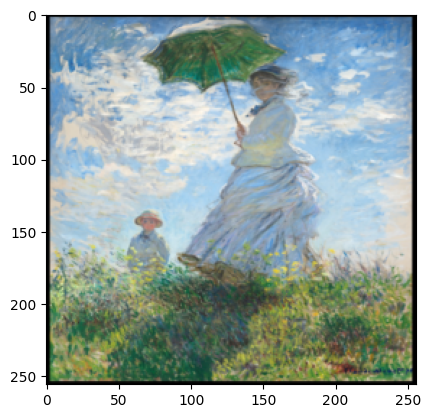

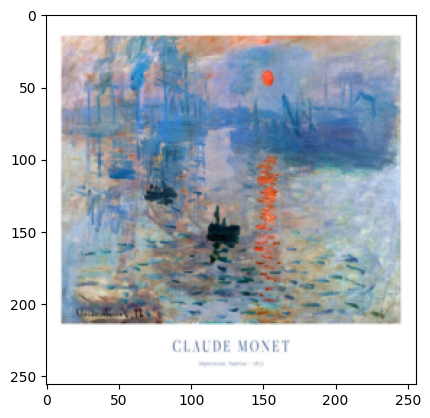

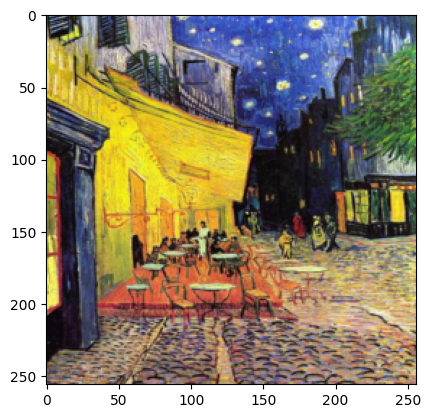

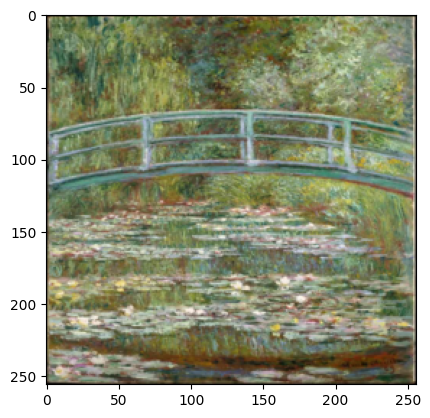

In [11]:
content_image, style_image = next(iter(train_dl))

for i in range(content_image.shape[0]):
    plt.figure()
    plt.imshow(torch.permute(content_image[i], (1,2,0)).numpy())
    plt.imshow(torch.permute(style_image[i], (1,2,0)).numpy())
    plt.show()

In [13]:
from fast.model.custom_layers import AdaIN

ada_in = AdaIN()

style = encoder(style_image)
content = encoder(content_image)

t = ada_in(content["layer3"], style["layer3"])
generated = decoder(t)

generated.shape
torch.abs(generated)

tensor([[[[0.0349, 0.0421, 0.0342,  ..., 0.0450, 0.0308, 0.0399],
          [0.0351, 0.0705, 0.0420,  ..., 0.0724, 0.0399, 0.0646],
          [0.0360, 0.0370, 0.0326,  ..., 0.0368, 0.0316, 0.0410],
          ...,
          [0.0370, 0.0711, 0.0389,  ..., 0.0742, 0.0394, 0.0615],
          [0.0373, 0.0389, 0.0352,  ..., 0.0412, 0.0299, 0.0435],
          [0.0417, 0.0615, 0.0325,  ..., 0.0570, 0.0388, 0.0540]],

         [[0.0466, 0.0143, 0.0399,  ..., 0.0160, 0.0366, 0.0021],
          [0.0634, 0.0384, 0.0254,  ..., 0.0306, 0.0235, 0.0036],
          [0.0408, 0.0040, 0.0310,  ..., 0.0095, 0.0309, 0.0006],
          ...,
          [0.0576, 0.0303, 0.0340,  ..., 0.0349, 0.0347, 0.0028],
          [0.0396, 0.0090, 0.0225,  ..., 0.0163, 0.0284, 0.0006],
          [0.0344, 0.0235, 0.0294,  ..., 0.0234, 0.0304, 0.0150]],

         [[0.0389, 0.0923, 0.0361,  ..., 0.0933, 0.0400, 0.0811],
          [0.0785, 0.0600, 0.0900,  ..., 0.0606, 0.0847, 0.0625],
          [0.0529, 0.0862, 0.0475,  ..., 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


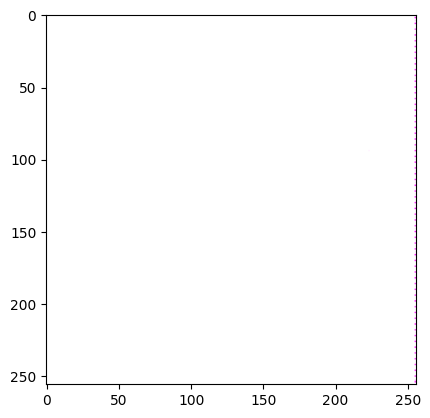

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


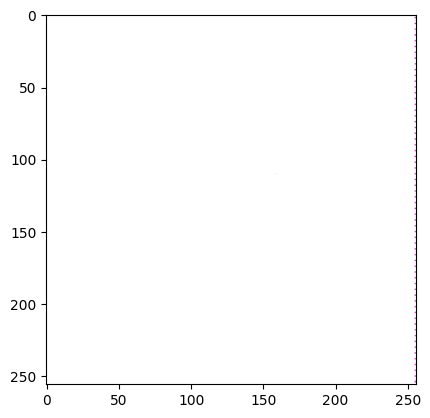

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


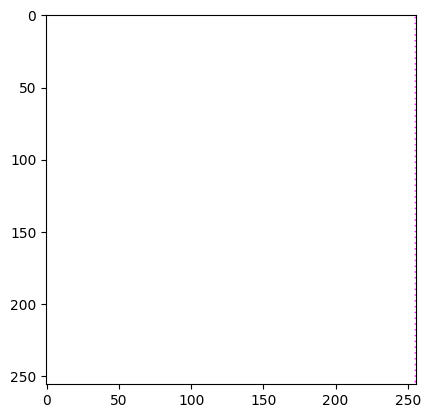

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


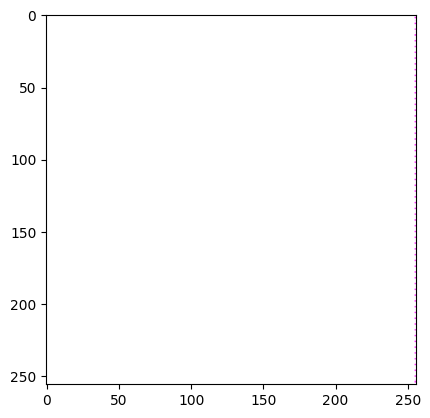

In [15]:
generated.shape

for i in range(generated.shape[0]):
    plt.figure()
    plt.imshow(torch.permute(torch.abs(generated[i,...]), (1, 2 ,0)).detach().numpy()*255, cmap='jet')
    plt.show()

In [ ]:
style_image.shape

In [ ]:
from fast.model.custom_layers import AdaIN

ada_in = AdaIN()

out = ada_in(content_image, style_image)
print(out.shape)

In [ ]:
import yaml
from pathlib import Path
import os

path = os.path.join(Path.cwd(), "src/parameters/params.yaml")
print(path)

# Read YAML file
with open(path, "r") as stream:
    config = yaml.safe_load(stream)

In [ ]:
config['batch_size']

config

In [23]:
from fast.model.custom_layers import CustomConv2D

conv = CustomConv2D(
    tens_temp.shape[1],
    128,
)
print(tens_temp.shape)
ret = conv(tens_temp)
ret.shape

torch.Size([1, 256, 16, 16])


torch.Size([1, 128, 16, 16])

In [28]:
from fast.model.autoencoder import Decoder2

dec2 = Decoder2(in_channels=256)

res_test = dec2(tens_temp)

res_test.shape

inputs_shape: torch.Size([1, 256, 16, 16])
X_shape b: torch.Size([1, 256, 18, 18])
X_shape: torch.Size([1, 128, 16, 16])
inputs_shape: torch.Size([1, 128, 2, 2])
X_shape b: torch.Size([1, 128, 4, 4])
X_shape: torch.Size([1, 128, 2, 2])
inputs_shape: torch.Size([1, 128, 2, 2])
X_shape b: torch.Size([1, 128, 4, 4])
X_shape: torch.Size([1, 128, 2, 2])
inputs_shape: torch.Size([1, 128, 2, 2])
X_shape b: torch.Size([1, 128, 4, 4])
X_shape: torch.Size([1, 128, 2, 2])
inputs_shape: torch.Size([1, 128, 2, 2])
X_shape b: torch.Size([1, 128, 4, 4])
X_shape: torch.Size([1, 64, 2, 2])
inputs_shape: torch.Size([1, 64, 2, 2])
X_shape b: torch.Size([1, 64, 4, 4])
X_shape: torch.Size([1, 64, 2, 2])
inputs_shape: torch.Size([1, 64, 2, 2])
X_shape b: torch.Size([1, 64, 4, 4])
X_shape: torch.Size([1, 32, 2, 2])
inputs_shape: torch.Size([1, 32, 2, 2])
X_shape b: torch.Size([1, 32, 4, 4])
X_shape: torch.Size([1, 32, 2, 2])
inputs_shape: torch.Size([1, 32, 2, 2])
X_shape b: torch.Size([1, 32, 4, 4])
X_shape

torch.Size([1, 3, 2, 2])